TODO:
1. Organizing helper functions to different .py files (e.g. util, query-related, parsing-related, etc)
2. Plot being cut off on the left
3. Redo instantiation parsing using context (we missed several cases!)
4. Remove repos that are sklearn fork
5. Redo ipynb & python comparison

# Python files that contains sklearn

### We search through all python files that are not a fork of sklearn (by repo_name and path), and count how many files contain 'sklearn' in the content.

In [403]:
%matplotlib notebook

In [404]:
from sklearn.externals.joblib import Memory
memory = Memory(cachedir=".",verbose=0)

In [405]:
from bigquery_python_framework.GithubPython import GithubPython
import matplotlib.pyplot as plt

In [406]:
@memory.cache
def run(query):
    return GithubPython().run(query)

In [407]:
def prettyPrintPythonCode(code):
    from pygments import highlight
    from pygments.lexers import PythonLexer
    from IPython.display import HTML
    from pygments.formatters import HtmlFormatter
    import IPython

    IPython.display.display(HTML('<style type="text/css">{}</style>{}'.format(
            HtmlFormatter().get_style_defs('.highlight'),
            highlight(code, PythonLexer(), HtmlFormatter()))))

In [408]:
def prettyPrintContext(context):
    i = 1
    for val, path, repo_name, count in context:
        print("%d."%i,)
        getGithubURL([(repo_name, path)])
        prettyPrintPythonCode(val)
        i +=1
    return

In [409]:
def getGithubURL(result):
    for repo_name, path in result:
        print("https://github.com/{}/tree/master/{}".format(repo_name,path))

In [410]:
# The getContext function can only return the first 
# occurence of modelName in each file
@memory.cache
def getContext(modelName):
  from google.cloud import bigquery
  client = bigquery.Client()
  query = '''\
  #standardSQL
  CREATE TEMPORARY FUNCTION parsePythonFile(a STRING)
  RETURNS STRING
  LANGUAGE js AS """
    if (a === null) {
      return null;
    }
    var lines = a.split('\\\\n');
    for (i=0;i<lines.length;i++) {
      if (lines[i].indexOf("%s")!==-1){
        return lines.slice(Math.max(i-10,0),Math.min(i+10,lines.length-1)).join("\\\\n");
      }
    }
  """;

  CREATE TEMPORARY FUNCTION parsePythonFile2(a STRING, b STRING)
  RETURNS STRING
  LANGUAGE js AS """
    if (a === null) {
      return null;
    }
    var lines = a.split('\\\\n');
    for (i=0;i<lines.length;i++) {
      if (lines[i].indexOf("%s")!==-1){
        return b;
      }
    }
  """;

  SELECT
    parsePythonFile(content) match,
    parsePythonFile2(content,sample_path) path,
    parsePythonFile2(content,sample_repo_name) repo_name,
    count(*) count
  FROM   
    `scikit-learn-research.pyfiles.content_py` 
  WHERE
     STRPOS(sample_repo_name, 'sklearn') = 0
     AND STRPOS(sample_repo_name, 'scikit-learn') = 0
     AND STRPOS(sample_path,'sklearn') = 0
     AND STRPOS(sample_path,'scikit-learn') = 0
     AND NOT(STRPOS(content, 'sklearn') = 0)
  GROUP BY
  1,2,3
  ORDER BY 
  count DESC
  '''% (modelName,modelName)
  result = client.run_sync_query(query)
  result.timeout_ms = 99999999
  result.run()
  return result.rows

In [411]:
"""
Cannot catch cases:
1) not direct import: import sklearn
    a = sklearn.SVC.SVC()

2) multiple lines: from sklearn.foo import bar,
    bas
"""
class sklearnImportBucket():
    def __init__(self):
        self.outliers = []
        self.subModule = set(['neighbors', 'neural_network', 'kernel_ridge', 'manifold', 'text', 'image', 'feature_extraction', 'cluster', 'partial_dependence', 'naive_bayes', 'estimator_checks', 'gaussian_process', 'utils', 'kernel_approximation', 'datasets', 'calibration', 'multiclass', 'decomposition', 'sparsefuncs', 'class_weight', 'discriminant_analysis', 'isotonic', 'mixture', 'linear_model', 'cross_decomposition', 'semi_supervised', 'covariance', 'libsvm', 'metrics', 'extmath', 'base', 'feature_selection', 'dummy', 'pipeline', 'svm', 'random_projection', 'multioutput', 'tree', 'ensemble', 'preprocessing', 'pairwise', 'validation', 'model_selection'])
        self.model = set(['Lars', 'RidgeClassifierCV', 'VarianceThreshold', 'Ridge', 'TSNE', 'AdaBoostClassifier', 'RadiusNeighborsClassifier', 'AgglomerativeClustering', 'QuantileTransformer', 'RadiusNeighborsRegressor', 'RandomTreesEmbedding', 'OAS', 'SGDRegressor', 'ParameterSampler', 'CCA', 'MiniBatchDictionaryLearning', 'StratifiedKFold', 'ElasticNetCV', 'BayesianGaussianMixture', 'SVR', 'DummyClassifier', 'ARDRegression', 'LassoLarsCV', 'DecisionTreeRegressor', 'ExtraTreeRegressor', 'SkewedChi2Sampler', 'OneClassSVM', 'MultinomialNB', 'NearestNeighbors', 'OneVsRestClassifier', 'LeaveOneGroupOut', 'RobustScaler', 'MultiTaskElasticNetCV', 'SVC', 'LassoLars', 'RidgeCV', 'LedoitWolf', 'SpectralEmbedding', 'GaussianProcessRegressor', 'GaussianMixture', 'IsolationForest', 'NearestCentroid', 'RandomizedSearchCV', 'MiniBatchKMeans', 'GradientBoostingRegressor', 'LinearSVC', 'DBSCAN', 'LabelBinarizer', 'GaussianNB', 'MultiOutputRegressor', 'QuadraticDiscriminantAnalysis', 'LinearSVR', 'RidgeClassifier', 'PatchExtractor', 'SelectFromModel', 'LinearRegression', 'Perceptron', 'GradientBoostingClassifier', 'Imputer', 'ExtraTreesClassifier', 'PassiveAggressiveClassifier', 'KernelPCA', 'KMeans', 'SelectPercentile', 'FeatureAgglomeration', 'LassoCV', 'ShuffleSplit', 'PCA', 'MultiLabelBinarizer', 'SelectKBest', 'Normalizer', 'RFECV', 'ParameterGrid', 'OneHotEncoder', 'IsotonicRegression', 'PassiveAggressiveRegressor', 'ShrunkCovariance', 'RegressorMixin', 'LocalOutlierFactor', 'EmpiricalCovariance', 'LabelEncoder', 'GridSearchCV', 'GroupKFold', 'IncrementalPCA', 'KNeighborsRegressor', 'RFE', 'ClassifierMixin', 'PLSRegression', 'MeanShift', 'NuSVR', 'KernelDensity', 'RepeatedStratifiedKFold', 'KNeighborsClassifier', 'GraphLassoCV', 'NuSVC', 'MultiTaskElasticNet', 'LeaveOneOut', 'ElasticNet', 'BaseEstimator', 'Lasso', 'LogisticRegression', 'GroupShuffleSplit', 'KernelRidge', 'BaggingClassifier', 'RANSACRegressor', 'PLSSVD', 'AdditiveChi2Sampler', 'SparseCoder', 'TruncatedSVD', 'CountVectorizer', 'LeavePOut', 'RandomForestClassifier', 'LogisticRegressionCV', 'EllipticEnvelope', 'TheilSenRegressor', 'GraphLasso', 'GaussianRandomProjection', 'MDS', 'StandardScaler', 'Pipeline', 'BernoulliNB', 'MiniBatchSparsePCA', 'MultiOutputClassifier', 'LocallyLinearEmbedding', 'OrthogonalMatchingPursuit', 'FastICA', 'RandomForestRegressor', 'MultiTaskLasso', 'LassoLarsIC', 'LeavePGroupsOut', 'DummyRegressor', 'SparsePCA', 'LatentDirichletAllocation', 'GenericUnivariateSelect', 'KDTree', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'NMF', 'BaggingRegressor', 'Binarizer', 'HuberRegressor', 'FactorAnalysis', 'PolynomialFeatures', 'FeatureHasher', 'TfidfTransformer', 'SelectFpr', 'KFold', 'DictVectorizer', 'PredefinedSplit', 'MaxAbsScaler', 'DistanceMetric', 'AdaBoostRegressor', 'TimeSeriesSplit', 'MLPRegressor', 'OneVsOneClassifier', 'LinearDiscriminantAnalysis', 'VotingClassifier', 'BallTree', 'SparseRandomProjection', 'SelectFdr', 'Birch', 'ExtraTreesRegressor', 'BernoulliRBM', 'KernelCenterer', 'LabelSpreading', 'RBFSampler', 'MultiTaskLassoCV', 'OutputCodeClassifier', 'ExtraTreeClassifier', 'FeatureUnion', 'StratifiedShuffleSplit', 'CalibratedClassifierCV', 'SpectralClustering', 'TransformerMixin', 'SGDClassifier', 'RepeatedKFold', 'OrthogonalMatchingPursuitCV', 'SelectFwe', 'FunctionTransformer', 'ClusterMixin', 'LabelPropagation', 'AffinityPropagation', 'MLPClassifier', 'Nystroem', 'HashingVectorizer', 'ClassifierChain', 'Isomap', 'DictionaryLearning', 'TfidfVectorizer', 'MinCovDet', 'PLSCanonical', 'BayesianRidge', 'LarsCV', 'MinMaxScaler'])
        self.function = set(['partial_dependence', 'make_friedman3', 'make_friedman2', 'make_friedman1', 'clear_data_home', 'safe_sparse_dot', 'distance_metrics', 'dict_learning', 'label_ranking_average_precision_score', 'lars_path', 'fetch_species_distributions', 'img_to_graph', 'inplace_row_scale', 'make_sparse_coded_signal', 'paired_manhattan_distances', 'pairwise_kernels', 'precision_recall_fscore_support', 'fbeta_score', 'explained_variance_score', 'confusion_matrix', 'auc', 'fit', 'ward_tree', 'polynomial_kernel', 'fetch_kddcup99', 'load_svmlight_file', 'orthogonal_mp', 'validation_curve', 'cross_val_score', 'make_regression', 'permutation_test_score', 'make_moons', 'f1_score', 'lasso_path', 'resample', 'median_absolute_error', 'load_linnerud', 'rbf_kernel', 'assert_all_finite', 'k_means', 'fastica', 'load_wine', 'homogeneity_score', 'reconstruct_from_patches_2d', 'r2_score', 'make_sparse_uncorrelated', 'zero_one_loss', 'label_binarize', 'orthogonal_mp_gram', 'accuracy_score', 'mean_shift', 'locally_linear_embedding', 'laplacian_kernel', 'dict_learning_online', 'make_pipeline', 'load_mlcomp', 'mutual_info_regression', 'johnson_lindenstrauss_min_dim', 'grid_to_graph', 'make_swiss_roll', 'hamming_loss', 'precision_score', 'calinski_harabaz_score', 'manhattan_distances', 'cross_validate', 'inplace_column_scale', 'label_ranking_loss', 'empirical_covariance', 'homogeneity_completeness_v_measure', 'load_digits', 'learning_curve', 'fetch_lfw_pairs', 'check_is_fitted', 'export_graphviz', 'check_random_state', 'cross_val_predict', 'make_multilabel_classification', 'compute_sample_weight', 'dbscan', 'average_precision_score', 'completeness_score', 'make_low_rank_matrix', 'kernel_metrics', 'load_sample_image', 'hinge_loss', 'pairwise_distances_argmin_min', 'shuffle', 'train_test_split', 'adjusted_mutual_info_score', 'roc_auc_score', 'sigmoid_kernel', 'safe_indexing', 'radius_neighbors_graph', 'check_increasing', 'indexable', 'column_or_1d', 'sparse_encode', 'brier_score_loss', 'fit_grid_point', 'normalized_mutual_info_score', 'linear_kernel', 'roc_curve', 'fetch_20newsgroups', 'maxabs_scale', 'dcg_score', 'load_breast_cancer', 'fetch_olivetti_faces', 'fetch_mldata', 'log_loss', 'mldata_filename', 'v_measure_score', 'make_blobs', 'cohen_kappa_score', 'consensus_score', 'l1_min_c', 'estimate_bandwidth', 'make_s_curve', 'make_hastie_10_2', 'pairwise_distances', 'spectral_embedding', 'check_array', 'lasso_stability_path', 'jaccard_similarity_score', 'f_classif', 'pairwise_distances_argmin', 'spectral_clustering', 'get_scorer', 'cosine_similarity', 'predict_proba', 'euclidean_distances', 'load_files', 'make_union', 'enet_path', 'make_sparse_spd_matrix', 'ledoit_wolf', 'isotonic_regression', 'make_spd_matrix', 'logistic_regression_path', 'check_consistent_length', 'make_biclusters', 'fetch_covtype', 'silhouette_score', 'fowlkes_mallows_score', 'check_cv', 'kneighbors_graph', 'load_sample_images', 'coverage_error', 'make_scorer', 'silhouette_samples', 'get_data_home', 'fetch_california_housing', 'dump_svmlight_file', 'check_X_y', 'inplace_swap_row', 'fetch_rcv1', 'check_symmetric', 'has_fit_parameter', 'calibration_curve', 'graph_lasso', 'paired_distances', 'make_classification', 'predict', 'f_regression', 'cosine_distances', 'robust_scale', 'mutual_info_classif', 'inplace_swap_column', 'cross_validation', 'adjusted_rand_score', 'paired_euclidean_distances', 'incr_mean_variance_axis', 'mean_absolute_error', 'classification_report', 'as_float_array', 'fetch_lfw_people', 'oas', 'plot_partial_dependence', 'check_estimator', 'extract_patches_2d', 'quantile_transform', 'normalize', 'load_boston', 'mean_variance_axis', 'binarize', 'paired_cosine_distances', 'chi2', 'fetch_20newsgroups_vectorized', 'clone', 'affinity_propagation', 'shrunk_covariance', 'load_diabetes', 'scale', 'load_svmlight_files', 'minmax_scale', 'matthews_corrcoef', 'smacof', 'add_dummy_feature', 'compute_class_weight', 'make_gaussian_quantiles', 'additive_chi2_kernel', 'decision_function', 'chi2_kernel', 'make_circles', 'ndcg_score', 'make_checkerboard', 'recall_score', 'mutual_info_score', 'mean_squared_log_error', 'load_iris', 'mean_squared_error', 'precision_recall_curve'])
        self.modelCount={key: 0 for key in self.model}
        self.subModuleCount={key: 0 for key in self.subModule}
        self.functionCount={key: 0 for key in self.function}

    def putInBucket(self, key, val, context):
        if key in self.subModule:
            self.subModuleCount[key] += val
        elif key in self.model:
            self.modelCount[key] += val
        elif key in self.function:
            self.functionCount[key] += val
        else:
            self.addOutlier(key,val,context)
    
    def addOutlier(self,key,val,context):
        self.outliers.append((key,val,context))

In [412]:
def parseDict(mostImportedSubmoduleDict):
    b = sklearnImportBucket()
    for key, val in mostImportedSubmoduleDict.items():
        """
        There are three cases:
        a) from sklearn.x import y as z
        b) from sklearn import x
        c) import sklearn.x.y.z
        """
        if key.startswith("from sklearn."):
            s1, s2 = key.split("from sklearn.")[1].split(" import")
            for s in s1.split(","):
                # import sklearn.foo.bar.baz
                for k in s.split("."):
                    b.putInBucket(k.strip(" ()#\n\r\t\""), val, key)
            for s in s2.split(","):
                # import sklearn.foo.bar.baz
                for k in s.split("."):
                    b.putInBucket(k.split(" as ")[0].strip(" ()#\n\r\t\""), val, key)
        elif key.startswith("from sklearn import"):
            ss = key.split("from sklearn import")[1].strip().split(" as ")
            if len(ss) >= 3:
                # weird string, put it in outlier
                b.addOutlier(key,val,key)
            else:
                # from sklearn import foo,bar,baz
                for k in ss[0].split(","):
                    b.putInBucket(k.split(" as ")[0].strip(" ()#\n\r\t"), val, key)

        elif key.startswith("import sklearn."):
            ss = key.split("import sklearn.")[1].strip()
            # import sklearn.this, sklearn.that,
            for s in ss.split(","):
                # import sklearn.foo.bar.baz
                for k in s.split("."):
                    b.putInBucket(k.split(" as ")[0].strip(" ()#\n\r\t\""), val, key)
        else:
            b.addOutlier(key, val, key)
    return b

In [413]:
@memory.cache
def parseInstantiation(L,param):
    d = dict()
    for val, count in L:
        val = val.replace(" ","")
        startIndex = val.find(param+"=")
        if startIndex != -1:
            startIndex = startIndex + len(param)
            startIndex += 1 # for '=' character
            endIndex = startIndex
            while endIndex < len(val) and val[endIndex] != ',':
                endIndex += 1
            d[val[startIndex:endIndex].strip(") ")] = d.get(val[startIndex:endIndex].strip(") "),0) + count 
            if (val[startIndex:endIndex].strip(") ") == ''):
                print(val)
    return d

In [414]:
@memory.cache
def queryByKeyword(keyword):
    keywordQuery = GithubPython().run("""\
    SELECT
        sample_repo_name,
        sample_path
    FROM (
    SELECT
      SPLIT(content, '\n') line,
      sample_repo_name,
      sample_path
    FROM
      [scikit-learn-research:pyfiles.content_py] 
    WHERE
      (NOT sample_repo_name CONTAINS "scikit-learn") AND
      (NOT sample_repo_name CONTAINS "sklearn") AND
      (NOT sample_path CONTAINS "scikit-learn") AND
      (NOT sample_path CONTAINS "sklearn")
    HAVING
      line CONTAINS '%s'
    )
    """ % keyword
    )
    return keywordQuery

In [415]:
@memory.cache
def getInstantiation(modelName):
    instantiateQuery = """\
    SELECT
      REGEXP_EXTRACT(content, r'(%s *\(.*?\))') match,
      count(*) count
    FROM   
      [scikit-learn-research:pyfiles.content_py] 
    WHERE
      (NOT sample_repo_name CONTAINS "scikit-learn") AND
      (NOT sample_repo_name CONTAINS "sklearn") AND
      (NOT sample_path CONTAINS "scikit-learn") AND
      (NOT sample_path CONTAINS "sklearn")
    GROUP BY
    match
    HAVING
      (NOT match is NULL)
    ORDER BY
    count DESC
    """ % (modelName)
    return run(instantiateQuery)

In [416]:
@memory.cache
def defaultInstantiationWithGridSearch(modelName):
    withGridSearch = """\
    SELECT
      COUNT(*) count from (
      SELECT
        REGEXP_EXTRACT(content, r'(%s *\(\))') match,
        content,
      FROM
        [scikit-learn-research:pyfiles.content_py]
      WHERE
        (NOT sample_repo_name CONTAINS "scikit-learn") AND
        (NOT sample_repo_name CONTAINS "sklearn") AND
        (NOT sample_path CONTAINS "scikit-learn") AND
        (NOT sample_path CONTAINS "sklearn") 
      )
    WHERE
      match!=""
      AND content CONTAINS 'GridSearchCV'
    """ % modelName
    withGridSearchNum = GithubPython().run(withGridSearch)[0][0]
    withoutGridSearch = """\
    SELECT
      COUNT(*) count from(
      SELECT
        REGEXP_EXTRACT(content, r'(%s *\(\))') match,
        content,
      FROM
        [scikit-learn-research:pyfiles.content_py]
      WHERE
        (NOT sample_repo_name CONTAINS "scikit-learn") AND
        (NOT sample_repo_name CONTAINS "sklearn") AND
        (NOT sample_path CONTAINS "scikit-learn") AND
        (NOT sample_path CONTAINS "sklearn")
      )
    WHERE
      match!=""
      AND NOT content CONTAINS 'GridSearchCV'
    """ % modelName
    withoutGridSearchNum = GithubPython().run(withoutGridSearch)[0][0]
    return (withGridSearchNum, withoutGridSearchNum)

In [417]:
def barhplot(result, xlabel, title,  color='green'):
    fig, ax = plt.subplots()
    xs = [x for x, _ in result]
    y_pos = range(len(xs))
    ys = [y for _, y in result]
    ax.barh(y_pos, ys, align='center', color=color, ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(xs)
    ax.invert_yaxis()  # labels read top-to-bottom
    for i, v in enumerate(ys):
        ax.text(v + 3, i + .25, str(v), color=color)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    plt.show()

In [418]:
def plotPie(labels, sizes):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

In [419]:
@memory.cache
def scatterPlotForPythonIpynbComparison(a,b,num):
    common_keys = list(set([key for key, _ in a[:num]]) & set([key for key, _ in b[:num]]))
    import numpy as np
    N = len(common_keys)
    x = [dict((key, val) for key, val in a)[key] for key in common_keys]
    y = [dict((key, val) for key, val in b)[key] for key in common_keys]
    colors = np.random.rand(N)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(x, y, s=10, c=colors)
    ax.set_xlabel('Python')
    ax.set_ylabel('ipynb')

    for i, txt in enumerate(common_keys):
        ax.annotate(txt, (x[i],y[i]))

    plt.show()

In [420]:
@memory.cache
def getResult(d, count=20):
    ks = sorted(d,key=d.get)[::-1][:count]
    return [(k,d[k]) for k in ks]

In [421]:
pythonFilesThatContainsSklearn = """\
SELECT
    COUNT(*) count 
FROM
    [scikit-learn-research.pyfiles.content_py]
WHERE
    (NOT sample_repo_name CONTAINS "scikit-learn") AND
    (NOT sample_repo_name CONTAINS "sklearn") AND
    (NOT sample_path CONTAINS "scikit-learn") AND
    (NOT sample_path CONTAINS "sklearn") AND
    (REGEXP_MATCH(content, r'from sklearn.*? import .+') OR
    REGEXP_MATCH(content, r'import sklearn'))
"""

In [422]:
result = run(pythonFilesThatContainsSklearn)

In [423]:
sklearnFile = result[0][0]
sklearnFile

32377

### How many python files in total?

In [424]:
howManyPythonFiles = """\
SELECT
    COUNT(*) count
FROM
    [scikit-learn-research.pyfiles.content_py]
WHERE
    (NOT sample_repo_name CONTAINS "scikit-learn") AND
    (NOT sample_repo_name CONTAINS "sklearn") AND
    (NOT sample_path CONTAINS "scikit-learn") AND
    (NOT sample_path CONTAINS "sklearn")
"""
totalFile = run(howManyPythonFiles)[0][0]

<IPython.core.display.Javascript object>


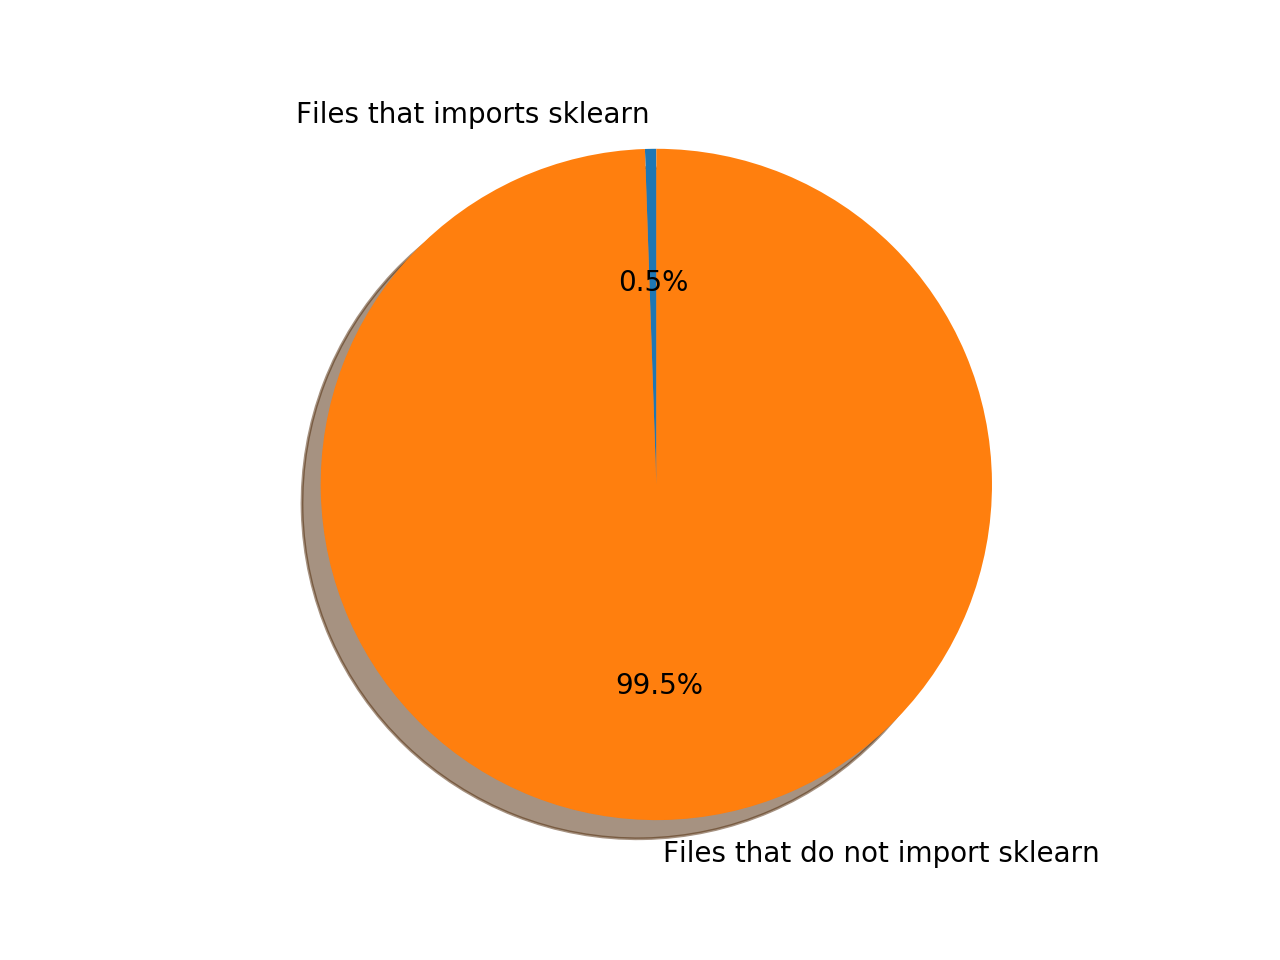

In [425]:
labels = 'Files that imports sklearn', 'Files that do not import sklearn'
sizes = [sklearnFile, totalFile-sklearnFile]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Repo that imports sklearn the most

### The most is in terms of number of lines

In [426]:
repoThatImportsSklearnTheMostQuery = """\
SELECT
  repo_name,
  COUNT(*) count
FROM (
    SELECT
      SPLIT(content, '\n') line,
      repo_name
    FROM
      [scikit-learn-research.pyfiles.content_py_full]
    WHERE
      (NOT repo_name CONTAINS "scikit-learn") AND
      (NOT repo_name CONTAINS "sklearn") AND
      (NOT path CONTAINS "scikit-learn") AND
      (NOT path CONTAINS "sklearn")
    HAVING
      REGEXP_MATCH(line, r'from sklearn.*? import .+') OR
      REGEXP_MATCH(line, r'import sklearn')
)
GROUP BY
  1
ORDER BY
  count DESC
"""

repoThatImportsSklearnTheMost = run(repoThatImportsSklearnTheMostQuery)

<IPython.core.display.Javascript object>


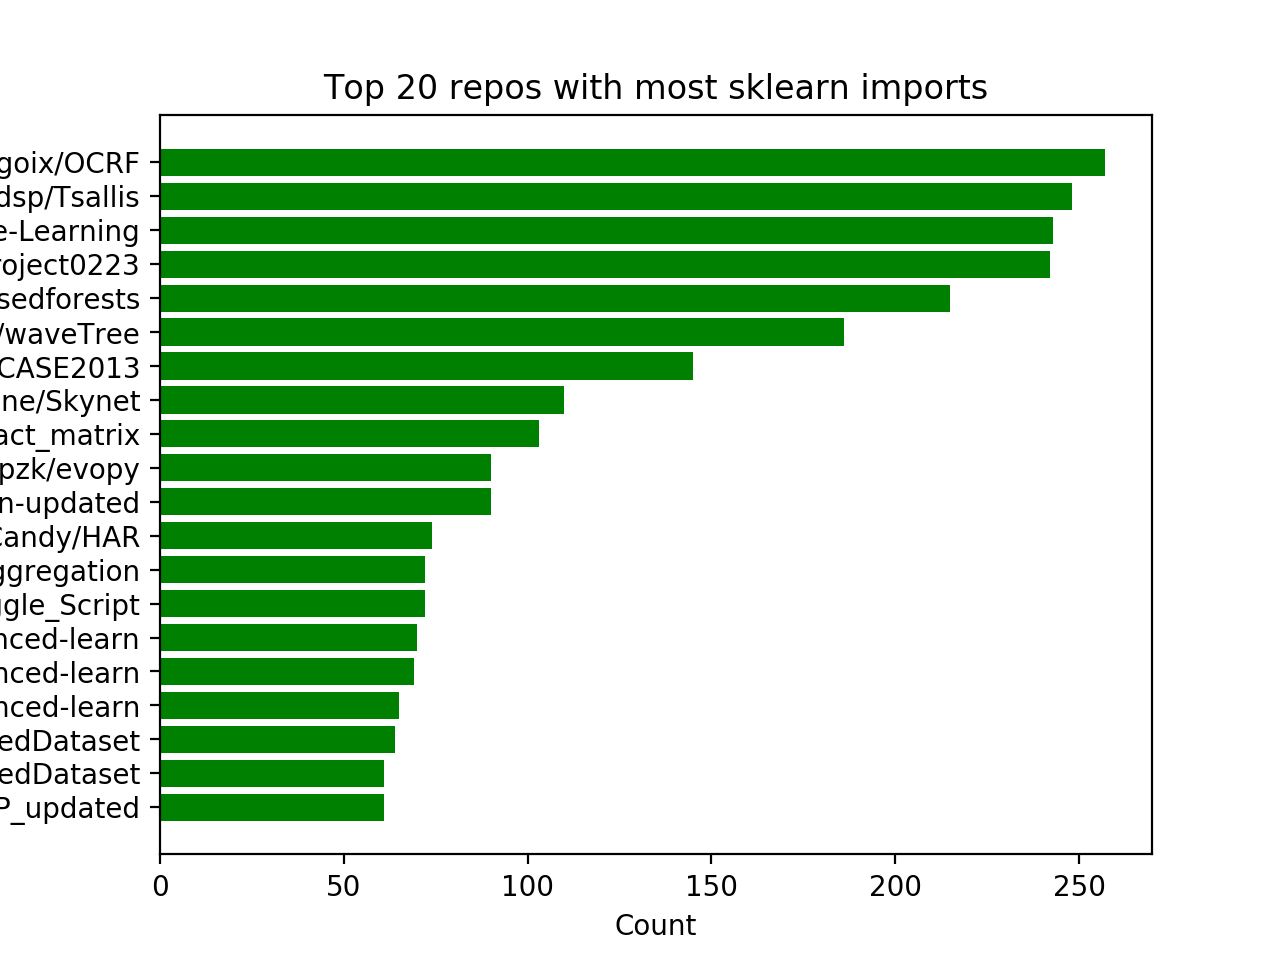

In [427]:
fig, ax = plt.subplots()

# Example data
repos = [repo for repo, _ in repoThatImportsSklearnTheMost[:20]]
y_pos = range(len(repos))
count = [count for _, count in repoThatImportsSklearnTheMost[:20]]

ax.barh(y_pos, count, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(repos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top 20 repos with most sklearn imports')

plt.show()

### It seems that filtering sklearn forks by path and repo_name is not good enough. For example, jjx02230808/project0223 is indeed a fork of sklearn. Although we exclude counting of files that has sklearn in the path, this repo still ranks high because it contains all sklearn examples. For those, they do not have "sklearn" in the path. See https://github.com/jjx02230808/project0223/blob/master/examples/calibration/plot_calibration.py for example

## Detail look of files that import sklearn

In [428]:
repoAndPathThatImportsSklearnQuery = """\
SELECT
  repo_name,
  path
FROM (
    SELECT
      SPLIT(content, '\n') line,
      repo_name,
      path
    FROM
      [scikit-learn-research.pyfiles.content_py_full]
    WHERE
      (NOT repo_name CONTAINS "scikit-learn") AND
      (NOT repo_name CONTAINS "sklearn") AND
      (NOT path CONTAINS "scikit-learn") AND
      (NOT path CONTAINS "sklearn")
    HAVING
      REGEXP_MATCH(line, r'from sklearn.*? import .+') OR
      REGEXP_MATCH(line, r'import sklearn')
)
"""

repoAndPathThatImportsSklearn = run(repoAndPathThatImportsSklearnQuery)

### Below is a list of GitHub urls that import "sklearn"

# Most common models

### What are the most common submodule imported?

In [429]:
mostImportedSubmoduleQuery="""\
SELECT
  REGEXP_EXTRACT(line, r'(from sklearn.*? import .+|import sklearn.*)'),
  COUNT(*) count
FROM (
    SELECT
      SPLIT(content, '\n') line,
      id
    FROM
      [scikit-learn-research:pyfiles.content_py] 
    WHERE
      (NOT sample_repo_name CONTAINS "scikit-learn") AND
      (NOT sample_repo_name CONTAINS "sklearn") AND
      (NOT sample_path CONTAINS "scikit-learn") AND
      (NOT sample_path CONTAINS "sklearn")
)
GROUP BY
  1
ORDER BY
  count DESC
"""
mostImportedSubmodule = run(mostImportedSubmoduleQuery)

In [430]:
# Let's clean up the suffix \r, etc.
from collections import defaultdict
mostImportedSubmoduleDict = defaultdict(int)
for key,val in mostImportedSubmodule:
    if key == None: continue
    newKey = key.strip(" \r\\;")
    if "#" in newKey:
        newKey = newKey.split("#")[0]
    mostImportedSubmoduleDict[newKey]+=int(val)

In [431]:
b = parseDict(mostImportedSubmoduleDict)

In [432]:
sorted(b.outliers, key=lambda x: x[1])[::-1]

[('joblib', 1838, 'from sklearn.externals import joblib'),
 ('externals', 1838, 'from sklearn.externals import joblib'),
 ('import sklearn', 1542, 'import sklearn'),
 ('grid_search', 1031, 'from sklearn.grid_search import GridSearchCV'),
 ('LDA', 236, 'from sklearn.lda import LDA'),
 ('lda', 236, 'from sklearn.lda import LDA'),
 ('RandomizedPCA', 185, 'from sklearn.decomposition import RandomizedPCA'),
 ('delayed', 164, 'from sklearn.externals.joblib import Parallel, delayed'),
 ('Parallel', 164, 'from sklearn.externals.joblib import Parallel, delayed'),
 ('joblib', 164, 'from sklearn.externals.joblib import Parallel, delayed'),
 ('externals', 164, 'from sklearn.externals.joblib import Parallel, delayed'),
 ('samples_generator',
  160,
  'from sklearn.datasets.samples_generator import make_blobs'),
 ('GMM', 156, 'from sklearn.mixture import GMM'),
 ('grid_search', 138, 'from sklearn import grid_search'),
 ('import sklearn as sk', 113, 'import sklearn as sk'),
 ('six', 112, 'from sklear

In [433]:
sorted(b.subModuleCount, key=lambda x: -b.subModuleCount[x])

['metrics',
 'preprocessing',
 'linear_model',
 'svm',
 'ensemble',
 'datasets',
 'feature_extraction',
 'cluster',
 'decomposition',
 'text',
 'utils',
 'model_selection',
 'neighbors',
 'tree',
 'base',
 'pipeline',
 'naive_bayes',
 'feature_selection',
 'pairwise',
 'manifold',
 'mixture',
 'neural_network',
 'multiclass',
 'validation',
 'gaussian_process',
 'covariance',
 'extmath',
 'discriminant_analysis',
 'image',
 'estimator_checks',
 'dummy',
 'calibration',
 'kernel_ridge',
 'kernel_approximation',
 'random_projection',
 'cross_decomposition',
 'isotonic',
 'semi_supervised',
 'partial_dependence',
 'libsvm',
 'sparsefuncs',
 'multioutput',
 'class_weight']

### Example of showing all "import sklearn"

In [434]:
importSklearn = queryByKeyword('import sklearn$')

In [435]:
len(importSklearn)

0

In [436]:
getGithubURL(importSklearn)

### Plotting most imported submodule (including all models, methods and submodules)

<IPython.core.display.Javascript object>


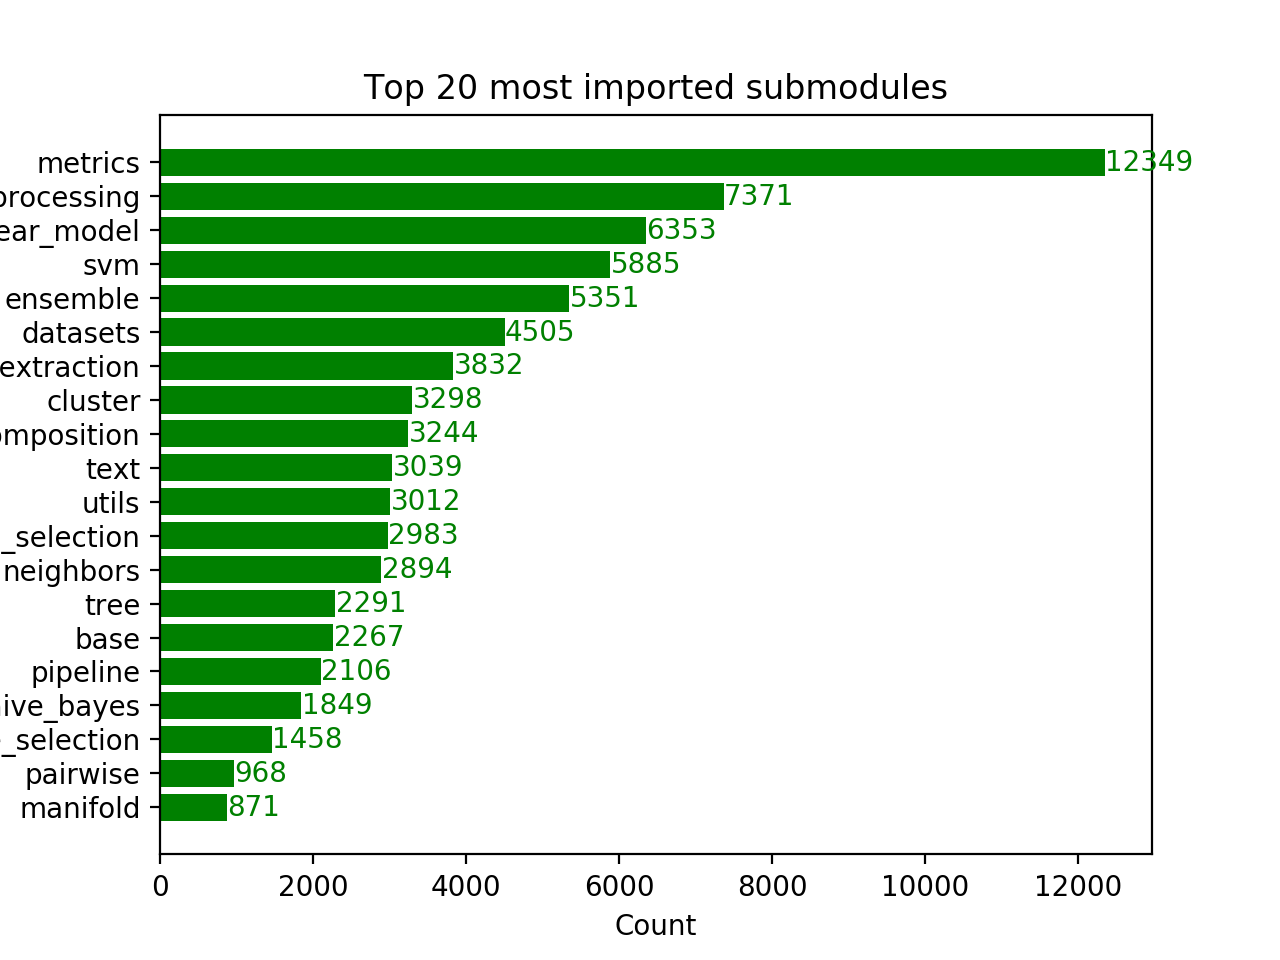

In [437]:
barhplot(getResult(b.subModuleCount), 'Count', 'Top 20 most imported submodules')

<IPython.core.display.Javascript object>


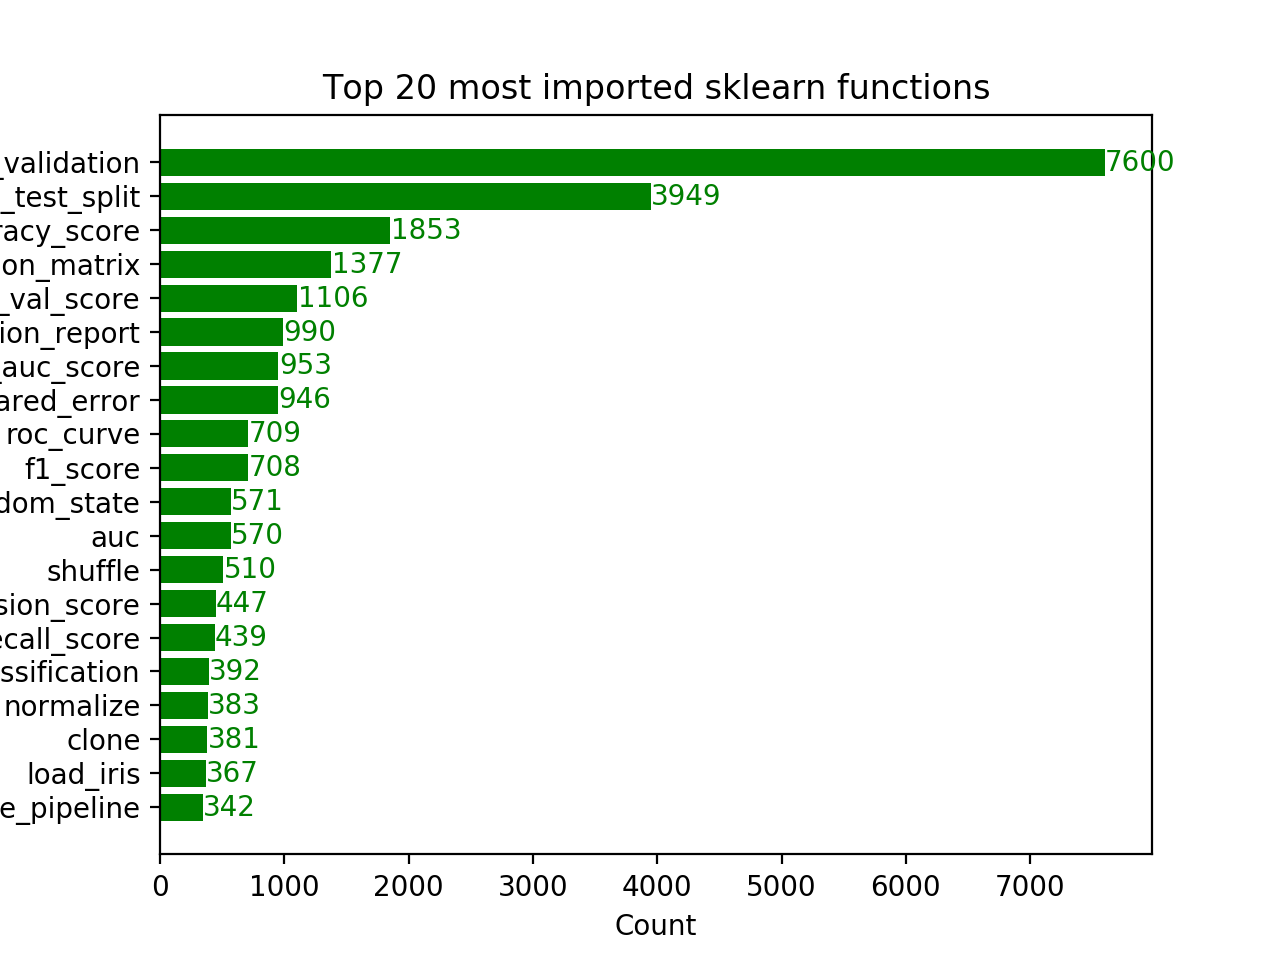

In [438]:
barhplot(getResult(b.functionCount), 'Count', 'Top 20 most imported sklearn functions')

<IPython.core.display.Javascript object>


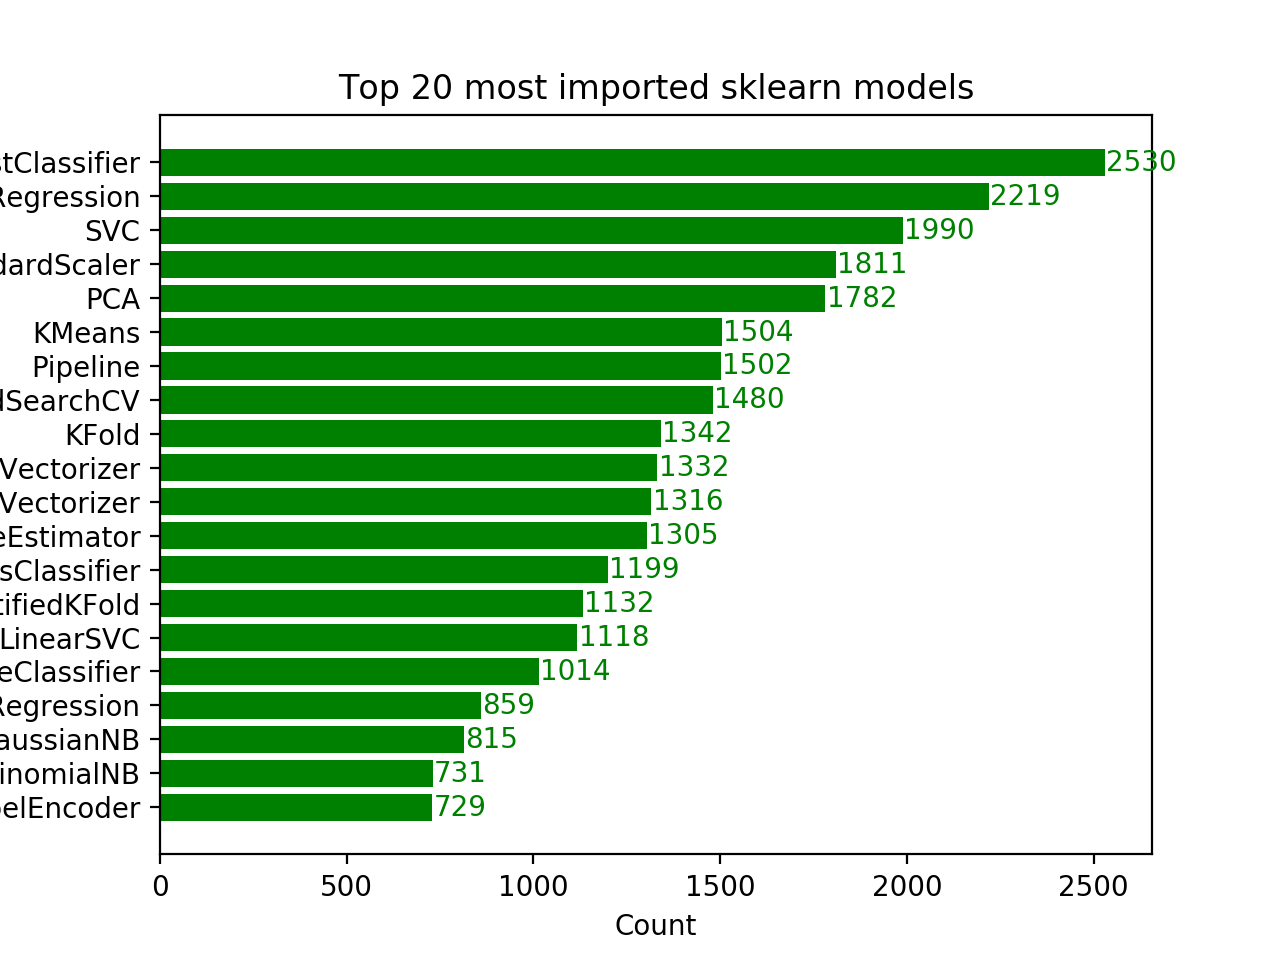

In [439]:
barhplot(getResult(b.modelCount), 'Count', 'Top 20 most imported sklearn models')

### What are the models/submodules/functions that are not used?

In [440]:
print("Not used models: %s" % list(model for model,count in b.modelCount.items() if count == 0))
print("Not used submodules: %s" % list(model for model,count in b.subModuleCount.items() if count == 0))
print("Not used functions: %s" % list(model for model,count in b.functionCount.items() if count == 0))

Not used models: ['RepeatedKFold', 'QuantileTransformer', 'ClassifierChain']
Not used submodules: []
Not used functions: ['paired_manhattan_distances', 'predict', 'make_biclusters', 'dcg_score', 'paired_euclidean_distances', 'inplace_swap_column', 'paired_cosine_distances', 'smacof', 'mean_squared_log_error', 'fit', 'make_sparse_uncorrelated', 'load_wine', 'ward_tree', 'partial_dependence', 'check_increasing', 'img_to_graph', 'incr_mean_variance_axis', 'cross_validate', 'ndcg_score', 'logistic_regression_path', 'inplace_swap_row', 'fetch_lfw_pairs', 'quantile_transform', 'inplace_row_scale']


### Now we compare between python files and ipython notebooks:

In [441]:
with open("ipynb/sklearn_submodule_import/most_imported_model_cleaned.csv", "r") as f:
    mostImportedModelipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

with open("ipynb/sklearn_submodule_import/most_imported_function_cleaned.csv", "r") as f:
    mostImportedFunctionipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

with open("ipynb/sklearn_submodule_import/most_imported_submodule_cleaned.csv", "r") as f:
    mostImportedSubmoduleipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

In [442]:
# scatterPlotForPythonIpynbComparison(mostImportedSubmodule, mostImportedSubmoduleipynb, 10)

In [443]:
# scatterPlotForPythonIpynbComparison(mostImportedModel, mostImportedModelipynb, 20)

# Context

### Context for GridSearchCV

In [444]:
gridSearchCVcontext = getContext("GridSearchCV(")
prettyPrintContext(gridSearchCVcontext[1:30])

1.
https://github.com/JiJingYu/tensorflow-exercise/tree/master/svm_grid_search/svm_grid_search.py


2.
https://github.com/oduwa/Wheat-Count/tree/master/build_classifier.py


3.
https://github.com/agadiraju/519finalproject/tree/master/decision_tree/dt_bike_sharing.py


4.
https://github.com/pymir3/pymir3/tree/master/scripts/acf/tr_svm_reg.py


5.
https://github.com/joekasp/ionic_liquids/tree/master/ionic_liquids/test/test_methods.py


6.
https://github.com/celikmustafa89/usedCarDatabase/tree/master/random_forest_model_sample.py


7.
https://github.com/sergiy-evision/math-algorithms/tree/master/data science/Assessment 6/2.py


8.
https://github.com/aalto-ics-kepaco/softALIGNF/tree/master/svm_code/run_svm.py


9.
https://github.com/alexfields/ORF-RATER/tree/master/rate_regression_output.py


10.
https://github.com/drublackberry/fantastic_demos/tree/master/TextClassification/text_classification.py


11.
https://github.com/PhDP/Articles/tree/master/1_Netflix/Supervised Learning/randomrandomforests.py


12.
https://github.com/rasbt/mlxtend/tree/master/mlxtend/preprocessing/tests/test_copy_transformer.py


13.
https://github.com/nicproulx/mne-python/tree/master/mne/cov.py


14.
https://github.com/salma1601/nilearn/tree/master/examples/decoding/plot_haxby_grid_search.py


15.
https://github.com/lellisls/Neuro/tree/master/Relatórios/Projeto1-MLP.py


16.
https://github.com/omerwe/LEAP/tree/master/leap/regression/leapUtils.py


17.
https://github.com/KellyChan/Kaggle/tree/master/kaggle-data-science-london-scikitlearn/src/classify.py


18.
https://github.com/lidalei/DataMining/tree/master/challenge.py


19.
https://github.com/nhzandi/openface/tree/master/demos/web/websocket-server.py


20.
https://github.com/WojciechMigda/KAGGLE-prudential-life-insurance-assessment/tree/master/src/toycode.py


21.
https://github.com/e-koch/Phys-595/tree/master/project_code/Example Scripts/grid_search_digits.py


22.
https://github.com/MadsJensen/RP_scripts/tree/master/graph_pagerank_xgb.py


23.
https://github.com/tgsmith61591/skutil/tree/master/skutil/utils/tests/test_util.py


24.
https://github.com/beifert/QFL/tree/master/qfl/scripts/scratch.py


25.
https://github.com/elijahc/ml_v1/tree/master/pretrained_feature_extraction/grid_search.py


26.
https://github.com/xphongvn/smart-attendance-system-ta/tree/master/src/backend/make_classifier.py


27.
https://github.com/anonymous-ijcai/dsw-ont-ijcai/tree/master/dswont/topics.py


28.
https://github.com/cycomachead/info290/tree/master/project/code/analysis/log_reg.py


29.
https://github.com/wei-Z/Python-Machine-Learning/tree/master/code/optional-py-scripts/ch07.py


### Context for Pipeline

In [445]:
pipelineContext = getContext("Pipeline(")
prettyPrintContext(pipelineContext[1:30])

1.
https://github.com/jdurbin/sandbox/tree/master/python/scikitlearn/survivaltest/scripts/kaggleinspired_nowmitAttributeSel.py


2.
https://github.com/choldgraf/mne-python/tree/master/examples/realtime/rt_feedback_server.py


3.
https://github.com/jbkopecky/housebot/tree/master/models/lasso_model_selection.py


4.
https://github.com/JudoWill/ResearchNotebooks/tree/master/NewCannabAnalysis.py


5.
https://github.com/kingjr/meg_perceptual_decision_symbols/tree/master/sandbox/decoding/precision_gat.py


6.
https://github.com/timpalpant/KaggleTSTextClassification/tree/master/scripts/predictors.py


7.
https://github.com/bcraenen/KFClassifier/tree/master/other/methods/PassiveAggressiveSample.py


8.
https://github.com/adowaconan/Spindle_by_Graphical_Features/tree/master/test.py


9.
https://github.com/bkj/wit/tree/master/wit/examples/string-example.py


10.
https://github.com/mirjalil/IMDB-reviews/tree/master/code/classify_RandomForest.py


11.
https://github.com/gabrielfarah/OpenHub/tree/master/worker/usability/documentation_analysis/model_trainer.py


12.
https://github.com/Ernestyj/PyStudy/tree/master/finance/EnsembleTest.py


13.
https://github.com/urbansearchTUD/UrbanSearch/tree/master/urbansearch/clustering/sgdc_modelmanager.py


14.
https://github.com/chuajiesheng/twitter-sentiment-analysis/tree/master/methodology/scripts/run.py


15.
https://github.com/rupendrab/py_unstr_parse/tree/master/create_subtopic_mapper.py


16.
https://github.com/AndreLamurias/IBEnt/tree/master/src/postprocessing/ensemble_ner.py


17.
https://github.com/jbkopecky/housebot/tree/master/models/tda.py


18.
https://github.com/thepropterhoc/TreeHacks_2016/tree/master/Collected_Data/analysis.py


19.
https://github.com/quietcoolwu/myBuildingMachineLearningSystemsWithPython-second_edition/tree/master/ch06/02_tuning.py


20.
https://github.com/bmcfee/librosa/tree/master/librosa/util/feature_extractor.py


21.
https://github.com/ddofer/ProFET/tree/master/ProFET/feat_extract/OutPutRes.py


22.
https://github.com/ebattenberg/librosa/tree/master/librosa/util.py


23.
https://github.com/samouri/kinja-api/tree/master/Machine Learning/svm.py


24.
https://github.com/SeldonIO/seldon-server/tree/master/docker/examples/iris/keras/keras_pipeline.py


25.
https://github.com/eamosse/word_embedding/tree/master/train_model_graph.py


26.
https://github.com/peastman/msmbuilder/tree/master/msmbuilder/tests/test_lumping.py


27.
https://github.com/apmoore1/semeval/tree/master/svrs/aspect_finsvr.py


28.
https://github.com/linucks/textclass/tree/master/gridsearch_bow.py


29.
https://github.com/leriomaggio/code-coherence-analysis/tree/master/coherence.py


In [446]:
rfcContext = getContext("RandomForestClassifier()")

### Context for RandomForestClassifier

In [447]:
prettyPrintContext(rfcContext[1:20])

1.
https://github.com/lmc2179/chevrons/tree/master/chevrons/tests/tests.py


2.
https://github.com/dmytroKarataiev/MachineLearning/tree/master/learning/ud120-projects/choose_your_own/your_algorithm.py


3.
https://github.com/mkery/CS349-roads/tree/master/Driver_val.py


4.
https://github.com/jjardel/probablyPOTUS/tree/master/model/src/_model.py


5.
https://github.com/WING-NUS/corpSearch/tree/master/config.py


6.
https://github.com/afoss925/kaggle_schizophrenia_2014/tree/master/make_benchmarks.py


7.
https://github.com/deepchem/deepchem/tree/master/deepchem/models/tests/test_overfit.py


8.
https://github.com/ChristianSch/skml/tree/master/doc/auto_examples/example_br.py


9.
https://github.com/georgetown-analytics/housing-risk/tree/master/code/prediction/run_models.py


10.
https://github.com/valisc/reverse-game-of-life/tree/master/reverse_game_of_life/classifier/global_classifier.py


11.
https://github.com/octopicorn/bcikit/tree/master/lib/classifiers/CSPEstimator.py


12.
https://github.com/BhavyaLight/kaggle-predicting-Red-Hat-Business-Value/tree/master/preprocessing/feature selection.py


13.
https://github.com/reiinakano/scikit-plot/tree/master/examples/plot_feature_importances.py


14.
https://github.com/james-jz-zheng/jjzz/tree/master/ml/stock_prediction.py


15.
https://github.com/llautert/psychoPYTHON/tree/master/models.py


16.
https://github.com/sjyk/activedetect/tree/master/exampleExperiment.py


17.
https://github.com/ldamewood/kaggle/tree/master/revenue/rf.py


18.
https://github.com/Ambiruptor/Ambiruptor/tree/master/tests/models_benchmark.py


19.
https://github.com/tanayz/Kaggle/tree/master/Search_result/srr10.py


### Context for SVC

In [448]:
prettyPrintContext(getContext("SVC()")[1:20])

1.
https://github.com/liuyonggg/learning_python/tree/master/riddle/classisifer_example.py


2.
https://github.com/vene/ambra/tree/master/ambra/grid_search.py


3.
https://github.com/metzzo/Paraphrase_Identification/tree/master/learnModels.py


4.
https://github.com/allqoow/exerciseML/tree/master/week08.py


5.
https://github.com/njetty/Yelp-Review-Analysis/tree/master/Task1/CreateClassifiersusingPOSTagger.py


6.
https://github.com/flyfj/deepmodels/tree/master/deepmodels/tf/samples/img_classifier.py


7.
https://github.com/Wittlich/DAT210x-Python/tree/master/Module6/assignment3.py


8.
https://github.com/laddie132/RITE_zh-CN/tree/master/Source/run.py


9.
https://github.com/bt3gl/MLNet-Classifying-Complex-Networks/tree/master/MLNet-2.0/plotting/feature_cross_validation/plot.py


10.
https://github.com/chkoar/imbalanced-learn/tree/master/imblearn/metrics/tests/test_score_objects.py


11.
https://github.com/hhain/sdap17/tree/master/notebooks/pawel_ueb2/evaluation.py


12.
https://github.com/DeadlyApps/SDTIG_Machine-Learning-Examples/tree/master/iris_prediction.py


13.
https://github.com/kizzen/Baller-Shot-Caller/tree/master/ModelFitting/single_SVM.py


14.
https://github.com/yvlasov/ConProbIN/tree/master/try-ml/try-local-v01.py


15.
https://github.com/query/mt-submissions/tree/master/hw3-evaluation/evaluate.py


16.
https://github.com/pomalley/ml_spam/tree/master/ml_spam/main.py


17.
https://github.com/Eric89GXL/mne-python/tree/master/mne/decoding/tests/test_csp.py


18.
https://github.com/rupakc/Kaggle---Email-Spam/tree/master/KaggleEmailSpam.py


19.
https://github.com/anilcs13m/Projects/tree/master/MovieReviewSentimentAnalysis/classifier.py


# Instantiation

### Instantiation of RandomForestClassifier

In [449]:
rfcInst = getInstantiation("RandomForestClassifier")

In [450]:
rfcInst[:50]

[('RandomForestClassifier()', 361),
 ('RandomForestClassifier(n_estimators=100)', 132),
 ('RandomForestClassifier(random_state=0)', 56),
 ('RandomForestClassifier(n_estimators=10)', 52),
 ('RandomForestClassifier(n_estimators = 100)', 51),
 ('RandomForestClassifier(n_estimators=100, n_jobs=-1)', 44),
 ('RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)', 43),
 ('RandomForestClassifier(n_estimators=500)', 25),
 ('RandomForestClassifier(n_estimators=1000)', 19),
 ('RandomForestClassifier(n_classifiers)', 18),
 ('RandomForestClassifier(n_estimators=50)', 18),
 ('RandomForestClassifier(n_jobs=-1)', 17),
 ('RandomForestClassifier(n_estimators=25)', 12),
 ('RandomForestClassifier(**kwargs)', 12),
 ('RandomForestClassifier(**params)', 12),
 ('RandomForestClassifier(n_jobs=2)', 11),
 ('RandomForestClassifier(n_estimators=30)', 11),
 ("RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=1)",
  11),
 ('RandomForestClassifier(n_estimators=n_estimators)', 10),


In [451]:
d = parseInstantiation(rfcInst,'n_estimators')
for k in sorted(d,key=d.get)[::-1]:
    print((k,d[k]))

('100', 375)
('10', 168)
('50', 70)
('1000', 66)
('500', 65)
('200', 39)
('n_estimators', 37)
('20', 35)
('300', 30)
('30', 28)
('1', 21)
('150', 19)
('25', 18)
('400', 12)
('rf_n_estimators', 11)
('250', 11)
('n_trees', 8)
('n', 8)
('10000', 8)
('750', 8)
('5', 8)
('40', 8)
('n_est', 7)
('2000', 7)
('15', 7)
('trees', 7)
('ntrees', 6)
('estimators', 6)
('80', 6)
('num_trees', 5)
('self.n_estimators', 4)
('256', 4)
('128', 4)
('60', 4)
('8', 4)
('RFC_estimators', 3)
('1024', 3)
('11', 3)
('120', 3)
('51', 3)
('2', 2)
('nr_of_trees', 2)
('6000', 2)
('3000', 2)
('options.n', 2)
('self.n_trees', 2)
('n_estimators[0]', 2)
('n_estimators_size', 2)
('1500', 2)
('800', 2)
('850', 2)
('64', 2)
('3', 2)
('pm.num_trees', 2)
('90', 2)
('4', 2)
('numTrees', 2)
('700', 2)
('101', 2)
('C', 2)
('estimator', 2)
('opts.numtrees', 2)
('5000', 2)
('int(SILLY_NUMBER*1.5', 1)
('17', 1)
('e', 1)
('95', 1)
('35', 1)
("self._settings.get('trees'", 1)
('15000', 1)
('240', 1)
('512', 1)
('1800', 1)
('22', 1)
('

In [463]:
d = parseInstantiation(rfcInst,'max_depth')
for k in sorted(d,key=d.get)[::-1]:
    print((k,d[k]))

('5', 67)
('None', 52)
('10', 30)
('1', 13)
('max_depth', 11)
('4', 10)
('15', 8)
('100', 8)
('20', 7)
('16', 6)
('8', 6)
('25', 6)
('3', 6)
('7', 4)
('depth', 4)
('2', 3)
('RFC_depth', 3)
('max_dep', 3)
('max_d', 2)
('maxDepth[0]', 2)
('9', 2)
('i', 2)
('60', 2)
('6', 2)
('13', 2)
('80', 1)
('hyper_parameter', 1)
('2000', 1)
('self.max_depth', 1)
('600', 1)
('max_tree_depth', 1)
('maxdepth', 1)
('C', 1)
('length', 1)
('int(sum(labels_binary[i]', 1)
('50', 1)
('md', 1)
('140', 1)
('700', 1)
('self.maxDepth', 1)
('22', 1)
('TREE_DEPTH', 1)


### Instantiation of GridSearchCV

In [452]:
gscvInst = getInstantiation("GridSearchCV")

In [453]:
print(len(gscvInst))

642


In [454]:
gscvInst[:50]

[('GridSearchCV(SVC()', 41),
 ('GridSearchCV(SVC(C=1)', 28),
 ('GridSearchCV(ShrunkCovariance(**method_params[this_method])', 23),
 ('GridSearchCV(KernelDensity()', 22),
 ('GridSearchCV(svm.SVC()', 18),
 ("GridSearchCV(SVC(kernel='rbf', class_weight='balanced')", 15),
 ("GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, scoring='roc_auc')",
  14),
 ("GridSearchCV(SVC(kernel='rbf', class_weight='auto')", 12),
 ('GridSearchCV(LinearSVC()', 12),
 ('GridSearchCV(SVC(C=1, probability=True)', 12),
 ('GridSearchCV(clf, parameters, verbose=1, refit=False, cv=kFolds)', 9),
 ("GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced')", 9),
 ('GridSearchCV(svm.SVC(C=1)', 9),
 ('GridSearchCV(LogisticRegression()', 9),
 ('GridSearchCV(AdaBoostClassifier()', 9),
 ('GridSearchCV(nn, param_grid, cv=2, refit=False, verbose=4)', 9),
 ("GridSearchCV(SVC(kernel='rbf')", 8),
 ("GridSearchCV(KNeighborsClassifier(weights='distance', n_jobs=-1)", 7),
 ('GridSearchCV(pipeline,param_grid=paramGrid

#### Common value for cv and scoring for GridSearchCV

In [455]:
d = parseInstantiation(gscvInst,'cv')
for k in sorted(d,key=d.get)[::-1]:
    print((k,d[k]))

('cv', 56)
('5', 54)
('10', 42)
('3', 29)
('2', 23)
('4', 11)
('kFolds', 10)
('kf', 9)
('kf5', 9)
('n_crossValidation', 8)
('skf', 7)
('self.cv', 7)
('cvk', 4)
('folds', 4)
('kfold', 4)
('cv_nested', 3)
('acv', 3)
('num_folds', 3)
('StratifiedKFold(y', 2)
('ss', 2)
('self.cross_validator', 2)
('k_folds', 2)
('8', 2)
('k', 2)
('skf_inner', 2)
('kf5_c', 2)
('sss', 2)
('12', 1)
('kf_cv', 1)
('cross_validation', 1)
('(folds-1', 1)
('n_folds', 1)
('ShuffleSplit(n_splits=10', 1)
('k_fold', 1)
('cross_validation(classes', 1)
('ssscv', 1)
('nfolds', 1)
('innerCV', 1)
('split', 1)
('shuffle', 1)
('kfolds', 1)
('args.cv', 1)
('25', 1)
('strat_2fold', 1)
('(5ifparameterselse2', 1)
('kcv', 1)
('inner_cv', 1)
('fold', 1)
('self.cv_', 1)
('ShuffleSplit(test_size=0.20', 1)
('folds_count', 1)


In [456]:
d = parseInstantiation(gscvInst,'scoring')
for k in sorted(d,key=d.get)[::-1]:
    print((k,d[k]))

("'accuracy'", 42)
("'roc_auc'", 30)
("'f1'", 18)
("'r2'", 14)
('scoring', 11)
('RMSE', 8)
('scorer', 8)
('score', 6)
("'mean_squared_error'", 5)
('spearman_scoring', 4)
("'log_loss'", 4)
('self.scoring', 4)
('"log_loss"', 3)
('"accuracy"', 3)
('neg_scorefun', 2)
("'mean_absolute_error'", 2)
('f1_scorer', 2)
('"roc_auc"', 2)
('p_value_scoring_object.p_value_scoring_object', 2)
('self.scoring_function', 2)
('metric', 2)
("'neg_mean_squared_error'", 2)
("'neg_log_loss'", 2)
('SCORING', 2)
("'precision_macro'", 2)
('"mean_absolute_error"', 1)
('"f1_micro"', 1)
('make_scorer(f1_score', 1)
('p_value_scoring_object.p_value_scoring_object_AD', 1)
('RSME', 1)
('"f1"', 1)
('custom_scorer', 1)
('self.gs_scoring', 1)
('metric_grid_search', 1)
('self.posfmeasure', 1)
('ams_scorer', 1)
('score_fnc', 1)
("self.config['ml']['metric']", 1)
('"neg_log_loss"', 1)
('make_scorer(error_function', 1)
('args.score', 1)
("'f1-score'", 1)
('scorerFunc', 1)
('grid_score', 1)
('measure', 1)
('accuracy_scorer', 1

### Instantiation of Pipelines

In [457]:
pipelineInst = getInstantiation("Pipeline")

In [458]:
pipelineInst

[('Pipeline(object)', 2310),
 ('Pipeline()', 1610),
 ('Pipeline(self)', 124),
 ('Pipeline(unittest.TestCase)', 100),
 ('Pipeline(options=pipeline_options)', 90),
 ('Pipeline(Pipeline)', 65),
 ('Pipeline("test")', 59),
 ('Pipeline(estimators)', 59),
 ('Pipeline(argv=pipeline_args)', 57),
 ('Pipeline(pipeline.Pipeline)', 46),
 ('Pipeline(FilesPipeline)', 46),
 ('Pipeline(parent=self, job=self.job, parameters=parameters)', 45),
 ('Pipeline(base_handler.PipelineBase)', 45),
 ('Pipeline(ImagesPipeline)', 41),
 ('Pipeline(MediaPipeline)', 39),
 ("Pipeline([('scaler', scaler)", 38),
 ('Pipeline(stages)', 35),
 ('Pipeline(BasePipeline)', 35),
 ('Pipeline(steps)', 33),
 ('Pipeline(base_pipeline.BasePipeline)', 31),
 ("Pipeline([('vect', CountVectorizer()", 31),
 ('Pipeline(pipeline)', 28),
 ("Pipeline('DirectPipelineRunner')", 27),
 ("Pipeline('DirectRunner')", 25),
 ("Pipeline([('CSP', csp)", 24),
 ('Pipeline(pipeline_base.PipelineBase)', 23),
 ('Pipeline( ConsoleReader()', 23),
 ('Pipeline(co

### When people use default param, do they use together with GridSearch?

In [459]:
rfcWithGridSearch, rfcWithoutGridSearch = defaultInstantiationWithGridSearch("RandomForestClassifier")

<IPython.core.display.Javascript object>


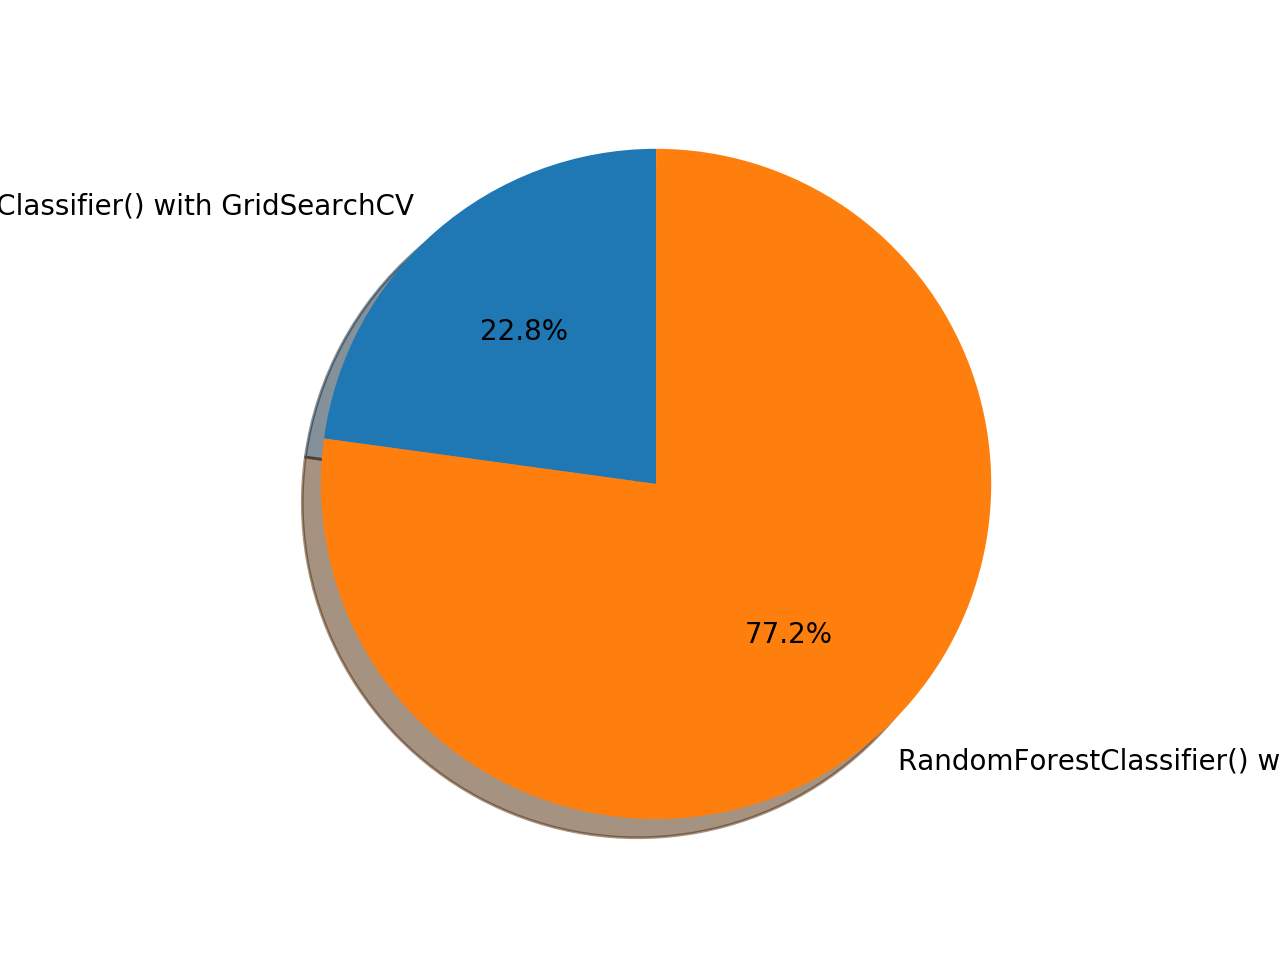

In [460]:
labels = 'RandomForestClassifier() with GridSearchCV', 'RandomForestClassifier() without GridSearchCV'
sizes = [rfcWithGridSearch, rfcWithoutGridSearch]
plotPie(labels,sizes)

<IPython.core.display.Javascript object>


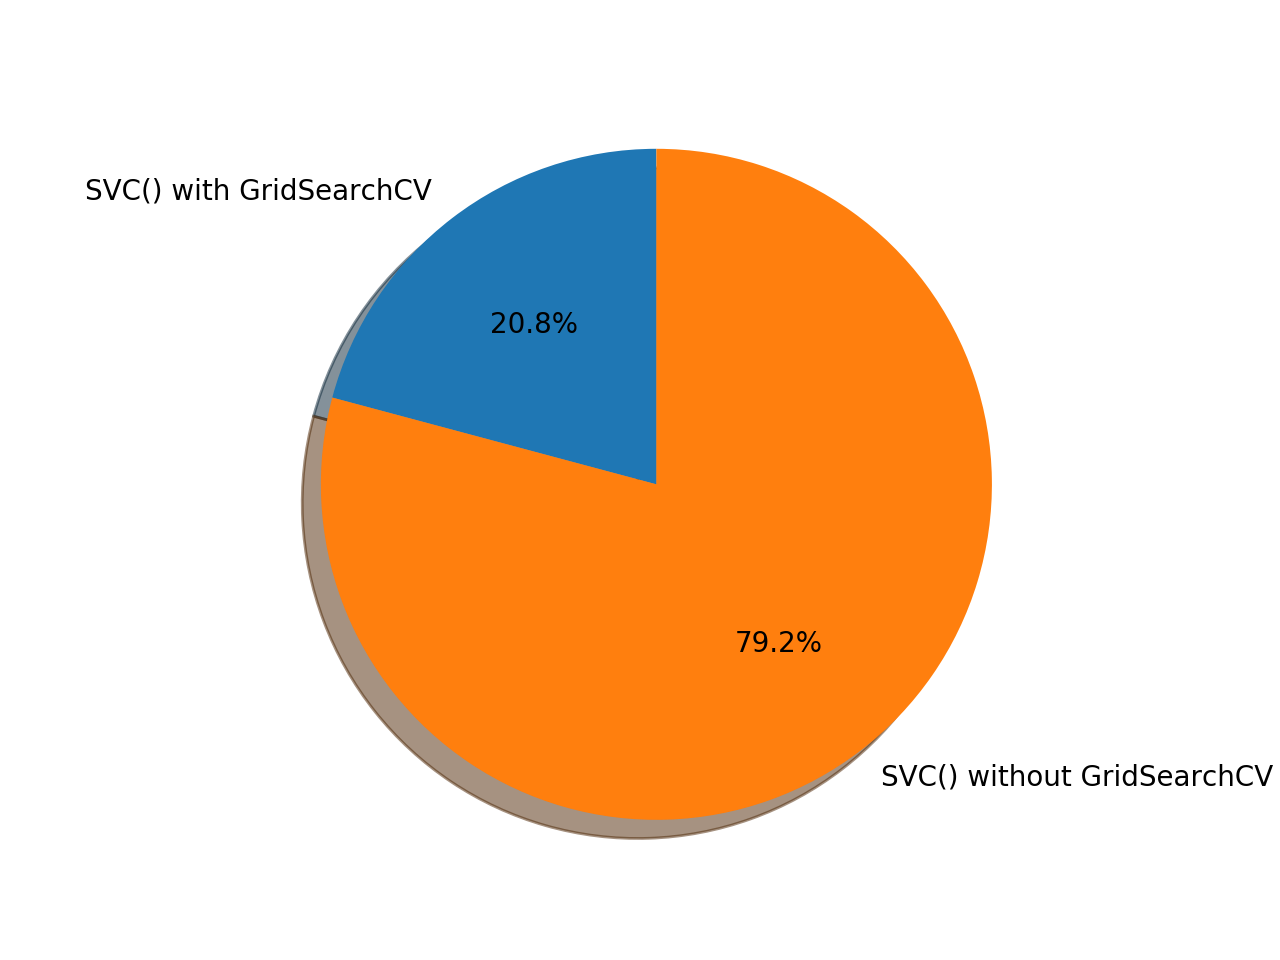

In [461]:
labels = 'SVC() with GridSearchCV', 'SVC() without GridSearchCV'
sizes = defaultInstantiationWithGridSearch('SVC')
plotPie(labels,sizes)

<IPython.core.display.Javascript object>


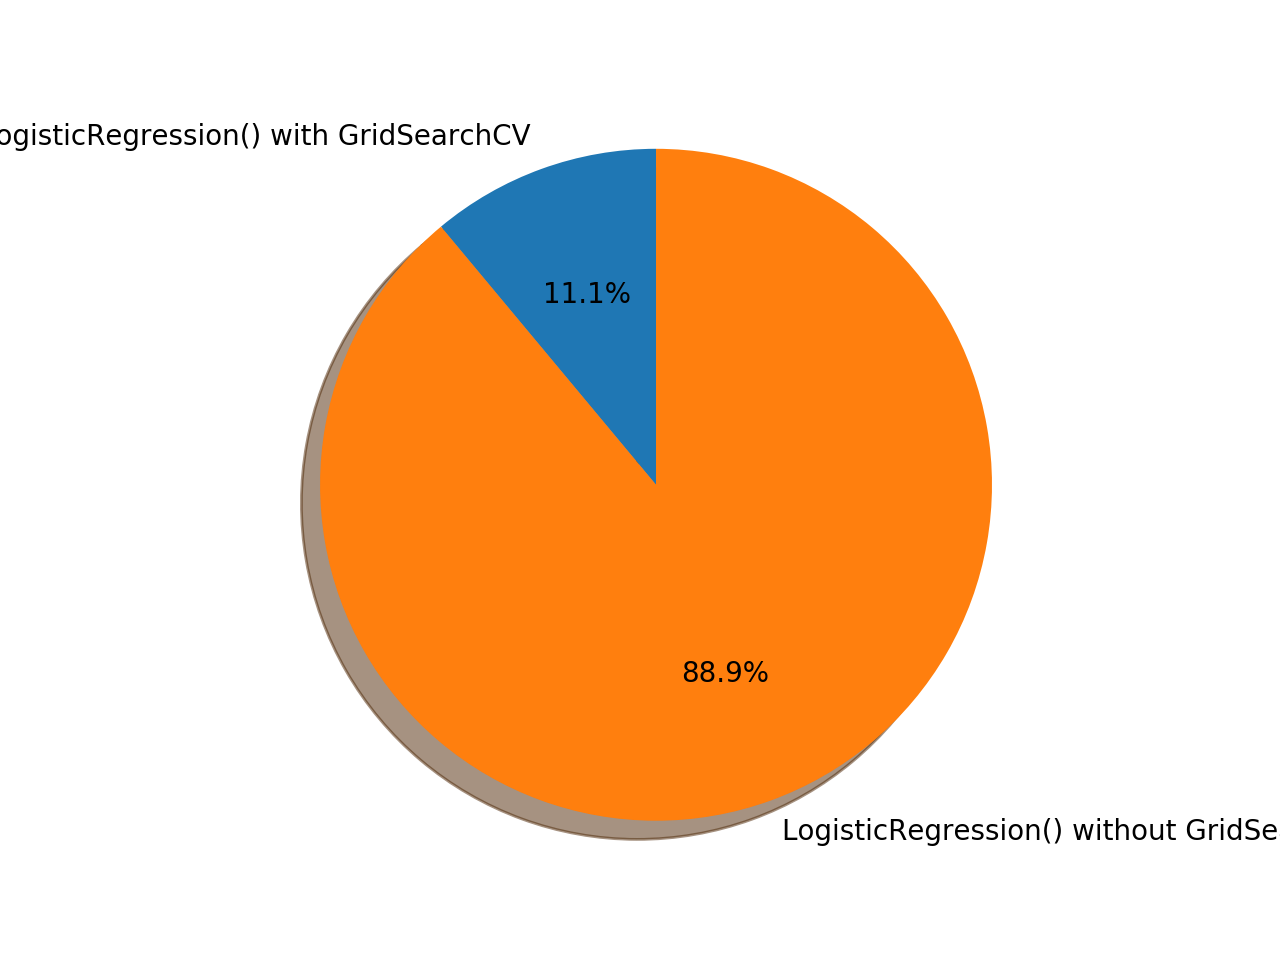

In [462]:
labels = 'LogisticRegression() with GridSearchCV', 'LogisticRegression() without GridSearchCV'
sizes = defaultInstantiationWithGridSearch('LogisticRegression')
plotPie(labels,sizes)